In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset_train = pd.read_csv('../input/google-stock-data/GOOGL.csv')

In [3]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [4]:
dataset_test = dataset_train.iloc[-57:]
dataset_train = dataset_train.iloc[:-57]

In [5]:
training_set = dataset_train.iloc[:,1:2].values

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
X_train = [ ]
y_train = [ ]
for i in range(60, 4146):
    X_train.append(training_set_scaled[i-60 : i, 0])
    y_train.append(training_set_scaled[ i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1 ))

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
# Initialising the RNN
regressor = Sequential()
# Step 1 – Adding the 1st LSTM layer and some dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Step 2 - Adding the 2nd LSTM layer and some dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Step 3 - Adding the 3rd LSTM layer and some dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Step 4 - Adding the 4th LSTM layer and some dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Step 5 – Adding Output Layer
regressor.add(Dense(units = 1))

2022-09-01 11:17:51.101266: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-01 11:17:51.219196: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-01 11:17:51.220003: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-01 11:17:51.221888: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [11]:
regressor.fit (X_train, y_train, epochs = 100, batch_size = 32)

2022-09-01 11:17:54.798155: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-09-01 11:18:00.342660: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


128/128 [==============================] - 9s 13ms/step - loss: 0.0028
Epoch 2/100
128/128 [==============================] - 2s 13ms/step - loss: 7.0088e-04
Epoch 3/100
128/128 [==============================] - 2s 13ms/step - loss: 6.4290e-04
Epoch 4/100
128/128 [==============================] - 2s 13ms/step - loss: 5.6646e-04
Epoch 5/100
128/128 [==============================] - 2s 14ms/step - loss: 5.4951e-04
Epoch 6/100
128/128 [==============================] - 2s 13ms/step - loss: 4.3769e-04
Epoch 7/100
128/128 [==============================] - 2s 13ms/step - loss: 4.1476e-04
Epoch 8/100
128/128 [==============================] - 2s 13ms/step - loss: 3.9864e-04
Epoch 9/100
128/128 [==============================] - 2s 13ms/step - loss: 4.1445e-04
Epoch 10/100
128/128 [==============================] - 2s 13ms/step - loss: 3.8818e-04
Epoch 11/100
128/128 [==============================] - 2s 15ms/step - loss: 3.9610e-04
Epoch 12/100
128/128 [==============================] - 2

In [12]:
real_stock_price = dataset_test.iloc[:, 1:2].values

In [13]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60: ].values
inputs = inputs.reshape( -1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 117) :
    X_test.append(inputs[i-60:i,0].tolist())
X_test = np.array(X_test)
X_test = np.reshape( X_test, (X_test.shape[0], X_test.shape[1], 1 ))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

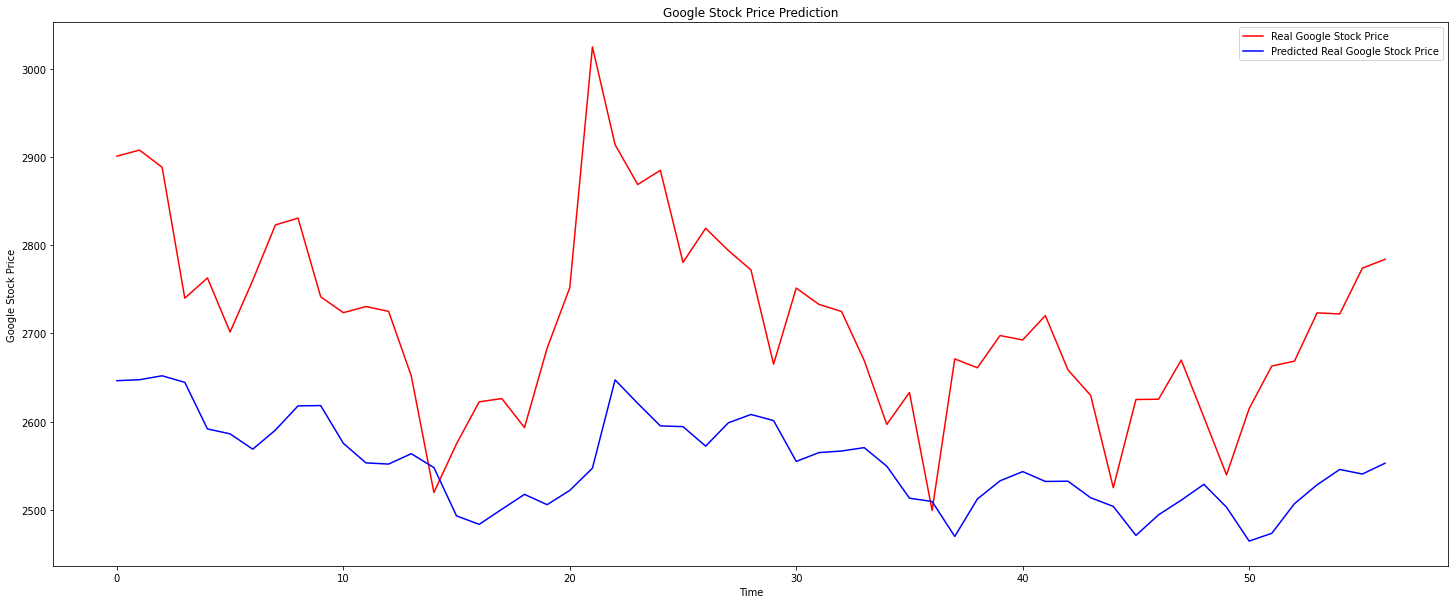

In [14]:
plt.figure(figsize = (25, 10))
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'Blue', label = 'Predicted Real Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel ('Time')
plt.ylabel ('Google Stock Price')
plt.legend()
plt.show()